In [5]:
import string
from datetime import datetime
import os
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from Queue import Queue
# import pickle
import cPickle as pickle

from scipy.sparse.linalg import svds

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [9]:
with open("adj_nmf_model_30.pkl", "r") as f:
    adj_topic_model = pickle.load(f)

In [10]:
with open("noun_nmf_model_30.pkl", "r") as f:
    noun_topic_model = pickle.load(f)

In [11]:
with open("data_structs.pkl", "rb") as f:
    (only_text_nouns,only_text_adjs,bid_to_rid_dict,rid_to_index) = pickle.load(f)

In [12]:
with open("nouns_tfidf_model.pkl", "r") as f:
    tfidf_vectorizer_nouns = pickle.load(f)

In [13]:
with open("adjs_tfidf_model.pkl", "r") as f:
    tfidf_vectorizer_adjs = pickle.load(f)

hello hello bye


(-0.5, 399.5, 199.5, -0.5)

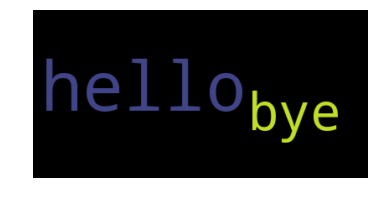

In [37]:
# the matplotlib way:

string= " ".join(["hello", "hello", "bye"])
print(string)
wordcloud = WordCloud().generate(string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [50]:
import math
import random

def generate_word_clouds(model, feature_names, n_top_words=50, 
                         basefile="noun_topic_wordcloud"):
    for topic_index, topic in enumerate(model.components_):
#         print(topic_index)
#         gen_text = " ".join([" ".join(features_names[i]*int(1+math.log((i+1)**2))) for i in topic.argsort()])
        sorted_ind = topic.argsort()[-n_top_words:]
        all_words = []
        for i, ind in enumerate(sorted_ind):
            curr_word_lst = [feature_names[ind]] * (i+1)
#             curr_word_lst = [feature_names[ind]] * int(math.log(1+i**2)+1)
#             curr_word_lst = [feature_names[ind]]
            
            all_words += curr_word_lst
        random.shuffle(all_words)
        gen_text = " ".join(all_words)
#         print(gen_text)
        wordcloud = WordCloud().generate(gen_text)
        wordcloud.to_file(basefile + str(topic_index) + ".png")
#         print(type(wordcloud))
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis("off")
#         print(gen_text)
generate_word_clouds(noun_topic_model, tfidf_vectorizer_nouns.get_feature_names())

In [20]:
math.log(1+1**2)

0.6931471805599453

In [29]:
def display_topics(model, feature_names, n_top_words):
    for topic_index, topic in enumerate(model.components_):
        print("Topic %d:" % topic_index)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words:-1]]))

In [30]:
display_topics(noun_topic_model, tfidf_vectorizer_nouns.get_feature_names(), 30)

Topic 0:
table server night experience people minutes dinner meal waitress manager waiter party tables group way friends wait hour water friend drinks room wine hostess reservation birthday day husband stars
Topic 1:
pizza crust pizzas toppings slice sauce cheese pepperoni delivery slices pie style sausage dough ingredients pasta york knots mozzarella places hut family salads area chicago oven joint home kids
Topic 2:
food atmosphere portions quality family times restaurants stars home servers places taste wait bland ambiance waitress court money decor owner drinks comfort eat environment mediocre fast pricey ambience bit
Topic 3:
place people friends family places town area reviews owner lot thing years stars try kind music way yelp atmosphere love fun times home date business things vibe owners decor
Topic 4:
burger fries burgers bacon bun onion cheese rings potato patty juicy shake joint toppings medium cheeseburger onions chili shakes meat veggie flavor guys truffle poutine way dog

In [13]:
# import csv
# with open("city_biz.csv", "r") as f:
#     reader = csv.reader(f, delimiter=",")
#     x = list(reader)
#     mat = np.array(x)
# city_business_ids = mat[1:,1]
# len(city_business_ids)

import json
city_business_ids = []
with open("biz_food_clustered.json", "r") as f:
    for line in f:
        
        business = json.loads(line)
#         print(business)
        city_business_ids.append(business["business_id"])
len(city_business_ids)

9857

In [14]:
bid_to_vecs = {}


for bid in city_business_ids:
    rids = bid_to_rid_dict[bid]
    nouns = ""
    adjs = ""
    for rid in rids:
        ind = rid_to_index[rid]
        nouns = nouns + " " + only_text_nouns[ind]
        adjs = adjs + " " + only_text_adjs[ind]
#     print(len(nouns))
    nouns_tfidf = tfidf_vectorizer_nouns.transform([nouns])
    adjs_tfidf = tfidf_vectorizer_adjs.transform([adjs])
    
#     print(nouns_tfidf.shape)
    
    noun_vec = noun_topic_model.transform(nouns_tfidf)
    adj_vec = adj_topic_model.transform(adjs_tfidf)
        
    bid_to_vecs[bid] = (noun_vec.tolist(), adj_vec.tolist())
bid_to_vecs

{u'74iNcDdhcWRpnawK_sTPmw': ([[0.0025272200320748,
    0.0,
    0.0036892339664737154,
    0.007083602858094484,
    0.0,
    0.00015242412758348516,
    0.001937965978257641,
    0.0033005142996056854,
    0.0042452836926871055,
    0.0025102202722274035,
    0.0003293199417331103,
    0.0,
    0.007579379652648081,
    0.0009426805038318943,
    0.0028137983798559737,
    0.0017851984208585197,
    0.0,
    0.02170163325027534,
    0.0003083446290243459,
    0.009093699035305722,
    0.0,
    0.0,
    0.003215842202132176,
    0.0,
    0.0,
    0.0009281528568270846,
    0.0034225710917744454,
    0.011024644523356195,
    0.0,
    0.0002072408519119697]],
  [[0.008373400043837733,
    0.0018844282298479652,
    0.006993739012205997,
    0.008599956339449318,
    0.0045801944784195255,
    0.006238724059895707,
    0.0009635967880408982,
    0.0011427906857616977,
    0.004170979478807154,
    0.00918911461316362,
    0.002880495434979544,
    0.0009488010709934582,
    0.00183679569

In [15]:
with open("business_id_to_nounadj_vecs.json", "w") as f:
    json.dump(bid_to_vecs, f)

In [19]:
with open("business_id_to_noun_topics.json", "w") as f:
    for bid, (noun_vec, adj_vec) in bid_to_vecs.items():
        json.dump({"business_id": bid,
                   "topic_vec": noun_vec[0]}, f)
        f.write("\n")
    

In [ ]:
# Get categories for each business
# Get top k (3) topics for each business
# Increment the count for the topic number for each category